<a href="https://colab.research.google.com/github/fairuznawar122/World-Happiness-Classification/blob/main/World_Happiness_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
# import os
# import shutil

# # Define paths
# drive_path = "/content/drive/My Drive/kaggle.json"
# kaggle_path = "/root/.kaggle/kaggle.json"

# # Create .kaggle directory if it doesn't exist
# os.makedirs("/root/.kaggle", exist_ok=True)

# # Copy the kaggle.json file
# shutil.copy(drive_path, kaggle_path)

# # Set the correct permissions
# os.chmod(kaggle_path, 600)
import os
os.environ['KAGGLE_USERNAME'] = "fariuznawar"
os.environ['KAGGLE_KEY'] = "6c2d1b94eb81cb2616870c4ea4764fda"

!kaggle datasets download -d mathurinache/world-happiness-report

Dataset URL: https://www.kaggle.com/datasets/mathurinache/world-happiness-report
License(s): CC0-1.0
world-happiness-report.zip: Skipping, found more recently modified local copy (use --force to force download)


In [138]:
import zipfile
with zipfile.ZipFile("world-happiness-report.zip", "r") as zip_ref:
    zip_ref.extractall("world-happiness-report")


### Accessing the Data files


In [139]:
year = input("Enter the Year: ")
filename = "world-happiness-report/" + year + ".csv"

Enter the Year: 2018


In [140]:
import pandas as pd
df = pd.read_csv(filename)
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


### Data Processing

In [141]:
if(year=="2015"):

  df.drop("Region", axis=1, inplace=True)
  df.drop("Dystopia Residual", axis=1, inplace=True)
  df.drop("Standard Error", axis=1, inplace=True)
  df = df.rename(columns={'Economy (GDP per Capita)': 'Economy'})
  df = df.rename(columns={'Trust (Government Corruption)': 'Trust'})
  df = df.rename(columns={'Health (Life Expectancy)': 'Health'})
  df = df.rename(columns={'Happiness Rank': 'Rank'})

if(year=="2018"):
  df = df.rename(columns={'Score': 'Happiness Score'})
  df = df.rename(columns={'Country or region': 'Country'})
  df = df.rename(columns={'Healthy life expectancy': 'Health'})
  df = df.rename(columns={'Perceptions of corruption': 'Trust'})
  df = df.rename(columns={'Freedom to make life choices': 'Freedom'})
  df = df.rename(columns={'Social support': 'Social Support'})
  df = df.rename(columns={'GDP per capita': 'Economy'})
  df= df.rename(columns={'Overall rank': 'Rank'})
  df = df.rename(columns={'Country or region': 'Country'})

if(year=="2020"):
  df['Rank'] = df.index + 1

  df.drop("Regional indicator", axis=1, inplace=True)
  df.drop("Standard error of ladder score", axis=1, inplace=True)
  df.drop("upperwhisker", axis=1, inplace=True)
  df.drop("lowerwhisker", axis=1, inplace=True)
  df.drop("Ladder score in Dystopia", axis=1, inplace=True)
  df.drop("Dystopia + residual", axis=1, inplace=True)
  df.drop("Explained by: Log GDP per capita", axis=1, inplace=True)
  df.drop("Explained by: Social support", axis=1, inplace=True)
  df.drop("Explained by: Healthy life expectancy", axis=1, inplace=True)
  df.drop("Explained by: Freedom to make life choices", axis=1, inplace=True)
  df.drop("Explained by: Generosity", axis=1, inplace=True)
  df.drop("Explained by: Perceptions of corruption", axis=1, inplace=True)
  #rename
  df = df.rename(columns={'Country name': 'Country'})
  df = df.rename(columns={'Ladder score': 'Happiness Score'})
  df = df.rename(columns={'Healthy life expectancy': 'Health'})
  df = df.rename(columns={'Perceptions of corruption': 'Trust'})
  df = df.rename(columns={'Freedom to make life choices': 'Freedom'})
  df = df.rename(columns={'Social support': 'Social Support'})
  df = df.rename(columns={'Logged GDP per capita': 'Economy'})
  df = df.rename(columns={'Country name': 'Country'})
  df = df.rename(columns={'Social support': 'Social Support'})

if(year=="2022"):
  df.drop("RANK", axis=1, inplace=True)
  df.drop("Country", axis=1, inplace=True)
  df.drop("Whisker-high", axis=1, inplace=True)
  df.drop("Whisker-low", axis=1, inplace=True)
  df.drop("Dystopia (1.83) + residual", axis=1, inplace=True)
  #rename
  df = df.rename(columns={'Explained by: GDP per capita': 'Economy'})
  df = df.rename(columns={'Explained by: Social support': 'Social Support'})
  df = df.rename(columns={'Explained by: Healthy life expectancy': 'Health'})
  df = df.rename(columns={'Explained by: Freedom to make life choices': 'Freedom'})
  df = df.rename(columns={'Explained by: Generosity': 'Generosity'})
  df = df.rename(columns={'Explained by: Perceptions of corruption': 'Trust'})
  df = df.rename(columns={'Happiness score': 'Happiness Score'})

  # To fix the numerical values in the data
  for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.replace(',', '.')

  # Convert all columns to numeric (excluding non-numeric columns like country names)
  for column in df.select_dtypes(include=['object']).columns:
    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError:
        # Handle the case if a column can't be converted (keep it as is)
        pass
  df = df[:-1]

df = df.dropna()
df

,Rank,Country,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [184]:
# Standardize the selected columns manually
standardized_df = df.copy()
for col in df.columns:
    if col== 'Country' or col== 'Rank' :
        continue
    standardized_df[col] = (df[col] - df[col].mean()) / df[col].std()

standardized_df.drop('Rank', axis=1, inplace=True)
standardized_df.drop('Country', axis=1, inplace=True)
standardized_df

TypeError: 'Categorical' with dtype category does not support reduction 'mean'

### Applying K-means

In [185]:
from sklearn.cluster import KMeans
import pandas as pd

def run_kmeans_and_save(original_df, features_to_scale, k_values=[2, 3]):

    # Run K-Means for each k value
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        original_df[f'Cluster k{k}'] = kmeans.fit_predict(standardized_df)

        # Optional: Print cluster sizes
        print(f"\nCluster sizes for K={k}:")
        print(original_df[f'Cluster k{k}'].value_counts())

    return original_df

In [186]:
# Example usage:
final_df = run_kmeans_and_save(
    original_df=standardized_df,
    features_to_scale=['age', 'income', 'spending_score'],
    k_values=[2, 3]
)

# Save the results
# final_df.to_csv('customer_data_with_clusters.csv', index=False)

ValueError: could not convert string to float: 'Finland'

In [187]:
standardized_df= pd.concat([standardized_df, df['Rank']], axis=1)
standardized_df= pd.concat([standardized_df, df['Country']], axis=1)
standardized_df

,Rank,Country,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust,Cluster k2,Cluster k3,Rank,Country
0,1,Finland,2.027059,1.106001,1.247792,1.116026,1.388175,0.212836,2.912165,-0.824842,2,1,Finland
1,2,Norway,1.993052,1.502387,1.214601,1.063673,1.418970,1.063133,2.362896,-0.824842,2,2,Norway
2,3,Denmark,1.958151,1.226755,1.241154,1.091863,1.400493,1.042888,3.067619,-0.824842,2,3,Denmark
3,4,Iceland,1.904457,1.205754,1.420386,1.277114,1.363540,1.741346,0.269453,-0.824842,2,4,Iceland
4,5,Switzerland,1.897297,1.407884,1.105071,1.329468,1.258839,0.759455,2.539077,-0.824842,2,5,Switzerland
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,-1.800462,-1.159434,-0.474825,-1.022414,-1.303262,-0.991752,-0.497452,1.204531,0,152,Yemen
152,153,Tanzania,-1.846998,-1.125308,-0.746992,-0.869380,0.156396,0.901172,-0.155454,1.204531,0,153,Tanzania
153,154,South Sudan,-1.890848,-1.435067,-2.018211,-1.690928,-2.116236,0.435533,-0.062181,1.204531,0,154,South Sudan
154,155,Central African Republic,-2.043877,-2.256714,-4.036230,-2.363469,-0.927569,0.374797,-0.766905,1.204531,0,155,Central African Republic


In [147]:
standardized_df.to_csv('standardized_df.csv', index=False)

In [188]:
standardized_df.drop('Rank', axis=1, inplace=True)
standardized_df.drop('Country', axis=1, inplace=True)

### Visualizing the Clusters

In [159]:
print("Please Enter THREE features for Visualitation.")
print("All Features: ")
for col in standardized_df.columns:
  if(col=="Cluster k3" or col=="Cluster k2"):
    continue
  print(col)

x = input("\nEnter Fearure 1: ")
y = input("Enter 2nd Fearure 2: ")
z = input("Enter 3rd Fearure 3: ")

Please Enter THREE features for Visualitation.
All Features: 
Happiness Score
Economy
Social Support
Health
Freedom
Generosity
Trust

Enter Fearure 1: Economy
Enter 2nd Fearure 2: Happiness Score
Enter 3rd Fearure 3: Health


In [161]:
import plotly.express as px
from PIL import Image
import io
import numpy as np

fig = px.scatter_3d(
    standardized_df,
    x,
    y,
    z,
    color='Cluster k2',
    opacity=0.8,

)
fig.update_layout(width=1000, height=900)
fig.show()


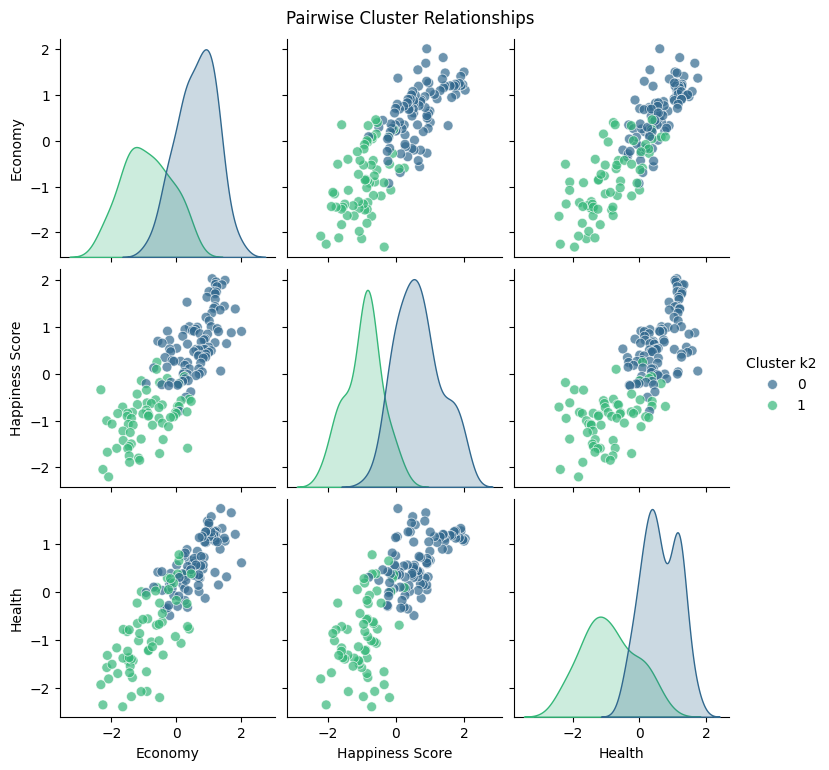

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select the features you want to visualize
plot_columns = [x,y,z,'Cluster k2']

sns.pairplot(
    standardized_df[plot_columns],
    hue='Cluster k2',
    palette='viridis',
    plot_kws={'alpha': 0.7, 's': 50}
)
plt.suptitle('Pairwise Cluster Relationships', y=1.02)
plt.show()

In [169]:
clusters = ['Cluster k2', 'Cluster k3']
df[clusters] = standardized_df[clusters]  # Copy to new df
standardized_df = standardized_df.drop(columns=clusters)


,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust
0,2.027059,1.106001,1.247792,1.116026,1.388175,0.212836,2.912165
1,1.993052,1.502387,1.214601,1.063673,1.418970,1.063133,2.362896
2,1.958151,1.226755,1.241154,1.091863,1.400493,1.042888,3.067619
3,1.904457,1.205754,1.420386,1.277114,1.363540,1.741346,0.269453
4,1.897297,1.407884,1.105071,1.329468,1.258839,0.759455,2.539077
...,...,...,...,...,...,...,...
151,-1.800462,-1.159434,-0.474825,-1.022414,-1.303262,-0.991752,-0.497452
152,-1.846998,-1.125308,-0.746992,-0.869380,0.156396,0.901172,-0.155454
153,-1.890848,-1.435067,-2.018211,-1.690928,-2.116236,0.435533,-0.062181
154,-2.043877,-2.256714,-4.036230,-2.363469,-0.927569,0.374797,-0.766905


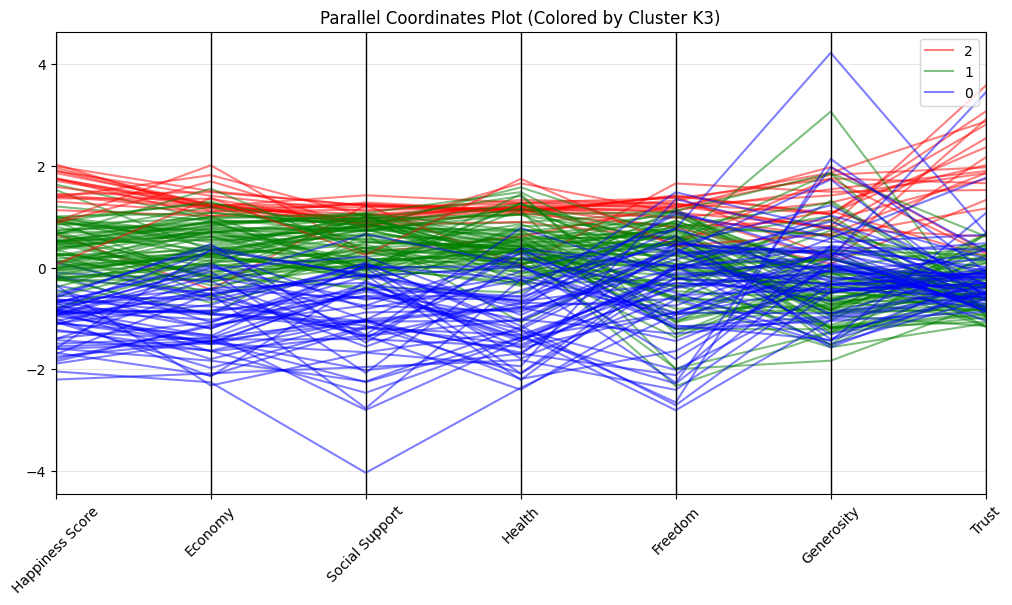

In [194]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# First ensure cluster_k3 is categorical
standardized_df['Cluster k3'] = standardized_df['Cluster k3'].astype('category')

# List of features to show (exclude cluster columns)
feature_columns = [col for col in standardized_df.columns
                  if col not in ['Cluster k2', 'Cluster k3']]

# Create plot
plt.figure(figsize=(12, 6))
parallel_coordinates(
    standardized_df,
    'Cluster k3',
    cols=feature_columns,
    color=['red', 'green', 'blue'],  # Direct color list
    alpha=0.5
)

plt.title('Parallel Coordinates Plot (Colored by Cluster K3)')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.show()

In [190]:
import seaborn as sns
import pandas as pd
import numpy as np



# Melt for plotting
melted = pd.melt(standardized_df, id_vars=['Cluster k3'],
                var_name='feature', value_name='value')

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=melted,
    x='feature',
    y='value',
    hue='Cluster k3',
    units=standardized_df.index,  # Preserve individual observations
    estimator=None,          # Show all lines
    palette='viridis',
    alpha=0.1
)
plt.title('Parallel Coordinates Style Plot')
plt.grid(axis='y')
plt.show()

ValueError: Length of Index vectors must match length of `data` when both are used, but `data` has length 1240 and the vector passed to `units` has length 155.

<Figure size 1200x600 with 0 Axes>

In [191]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12, 6))
parallel_coordinates(
    standardized_df.assign(cluster=df['Cluster k2'].astype(str)),df['Cluster k2'],
    colormap='viridis',
    alpha=0.5
)
plt.title('Parallel Coordinates Plot')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.show()

KeyError: "None of [Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n       ...\n       1, 1, 1, 1, 1, 1, 1, 1, 1, 1],\n      dtype='int32', length=155)] are in the [columns]"

<Figure size 1200x600 with 0 Axes>

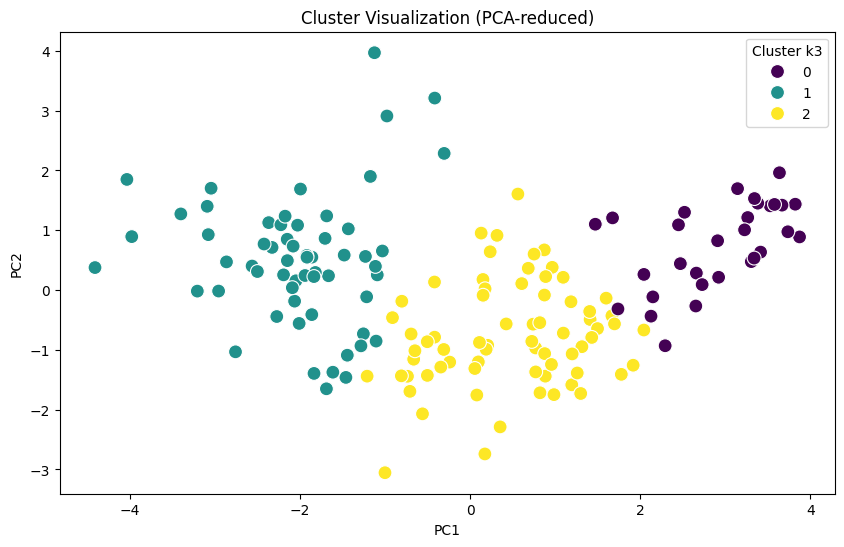

In [135]:
from sklearn.decomposition import PCA

# Reduce to 2D using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(
    standardized_df.drop(columns=['Cluster k3'])  # Exclude cluster column
)

# Create DataFrame for plotting
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster k3'] = standardized_df['Cluster k3']

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Cluster k3',
    palette='viridis',
    s=100
)
plt.title('Cluster Visualization (PCA-reduced)')
plt.show()